In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/dataset_ocorrencias_delegacia_5.csv")
df.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,id_ocorrencia,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao,latitude,longitude
0,OCR100000,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte,Concluído,-8.111355,-34.943524
1,OCR100001,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte,Arquivado,-8.082012,-34.861911
2,OCR100002,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte,Arquivado,-8.096916,-34.898378
3,OCR100003,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre,Concluído,-8.135066,-34.913460
4,OCR100004,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte,Concluído,-8.074124,-34.933504


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_ocorrencia             5000 non-null   object 
 1   data_ocorrencia           5000 non-null   object 
 2   bairro                    5000 non-null   object 
 3   tipo_crime                5000 non-null   object 
 4   descricao_modus_operandi  5000 non-null   object 
 5   arma_utilizada            5000 non-null   object 
 6   quantidade_vitimas        5000 non-null   int64  
 7   quantidade_suspeitos      5000 non-null   int64  
 8   sexo_suspeito             5000 non-null   object 
 9   idade_suspeito            5000 non-null   int64  
 10  orgao_responsavel         5000 non-null   object 
 11  status_investigacao       5000 non-null   object 
 12  latitude                  5000 non-null   float64
 13  longitude                 5000 non-null   float64
dtypes: float

In [5]:
df.describe()

,quantidade_vitimas,quantidade_suspeitos,idade_suspeito,latitude,longitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.986800,2.024400,41.506600,-8.100483,-34.900292
std,1.408908,1.423309,16.135998,0.028747,0.029133
min,0.000000,0.000000,14.000000,-8.149999,-34.949994
25%,1.000000,1.000000,28.000000,-8.124929,-34.925741
50%,2.000000,2.000000,41.000000,-8.100711,-34.900667
75%,3.000000,3.000000,55.000000,-8.075966,-34.875063
max,4.000000,4.000000,69.000000,-8.050003,-34.850032


In [6]:
df.isnull().sum()

id_ocorrencia               0
data_ocorrencia             0
bairro                      0
tipo_crime                  0
descricao_modus_operandi    0
arma_utilizada              0
quantidade_vitimas          0
quantidade_suspeitos        0
sexo_suspeito               0
idade_suspeito              0
orgao_responsavel           0
status_investigacao         0
latitude                    0
longitude                   0
dtype: int64

In [9]:
df = df.drop(['id_ocorrencia', 'longitude','latitude'], axis=1)
df.head()

,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao
0,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte,Concluído
1,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte,Arquivado
2,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte,Arquivado
3,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre,Concluído
4,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte,Concluído


MATRIZ DE CORRELAÇÃO

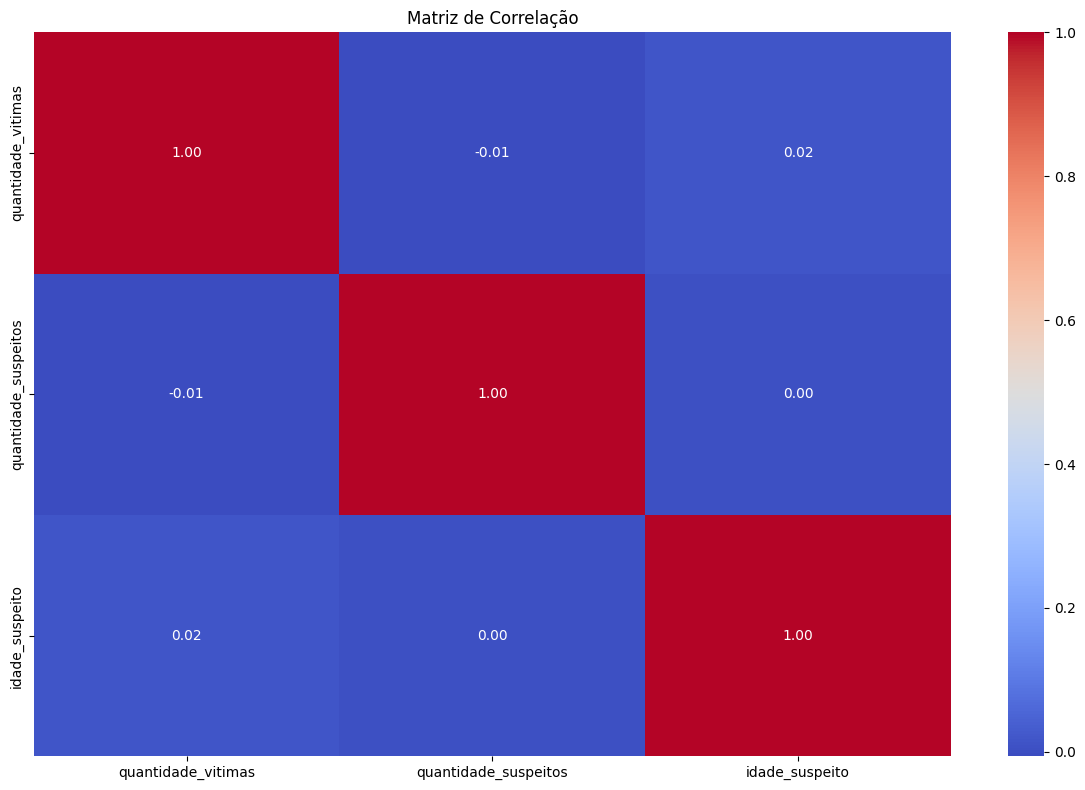

In [11]:
numericas_sem_geo = df.select_dtypes(include='number')

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numericas_sem_geo.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

##  Insights da Matriz de Correlação

**Principais descobertas:**
- **Correlações fracas entre variáveis numéricas**: Indica que as features são relativamente independentes, o que é positivo para modelagem
- **Ausência de multicolinearidade forte**: Não há correlações altas (>0.8) que possam prejudicar o modelo



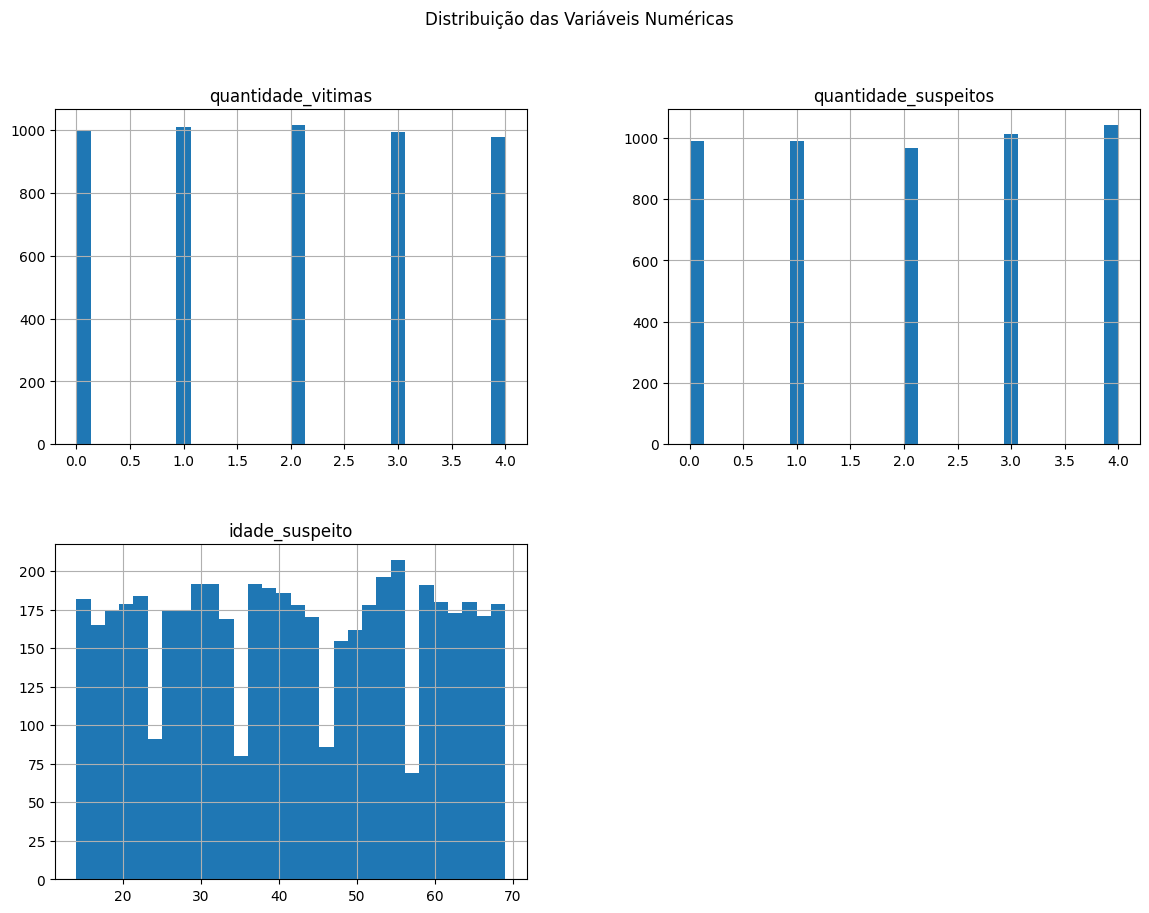

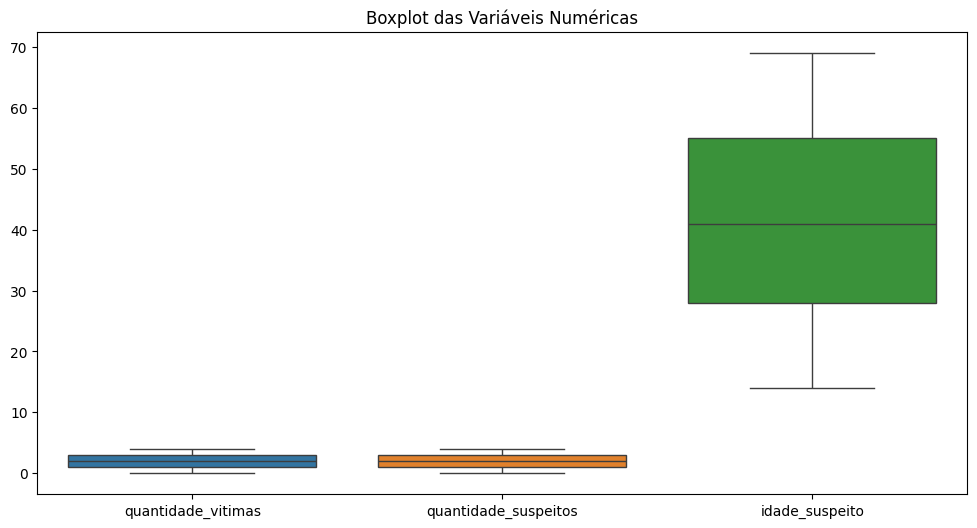

In [12]:
# Histograma
df.hist(figsize=(14,10), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()

# Boxplot geral
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot das Variáveis Numéricas")
plt.show()


## 📈 Insights das Distribuições Numéricas

**Principais descobertas:**
- **Quantidade de vítimas e suspeitos**: Distribuições assimétricas com concentração em valores baixos (1-3)
- **Idade dos suspeitos**: Distribuição aparentemente normal com centro em torno de 30-40 anos
- **Presença de outliers**: Valores extremos identificados nos boxplots, principalmente em idades e quantidades

**Implicações para modelagem:**
- **Necessidade de tratamento de outliers**: Especialmente em idade e quantidades
- **Possível normalização**: Algumas variáveis podem se beneficiar de transformações (log, sqrt)
- **Categorização de idades**: Criar faixas etárias pode ser mais efetivo que usar idade contínua

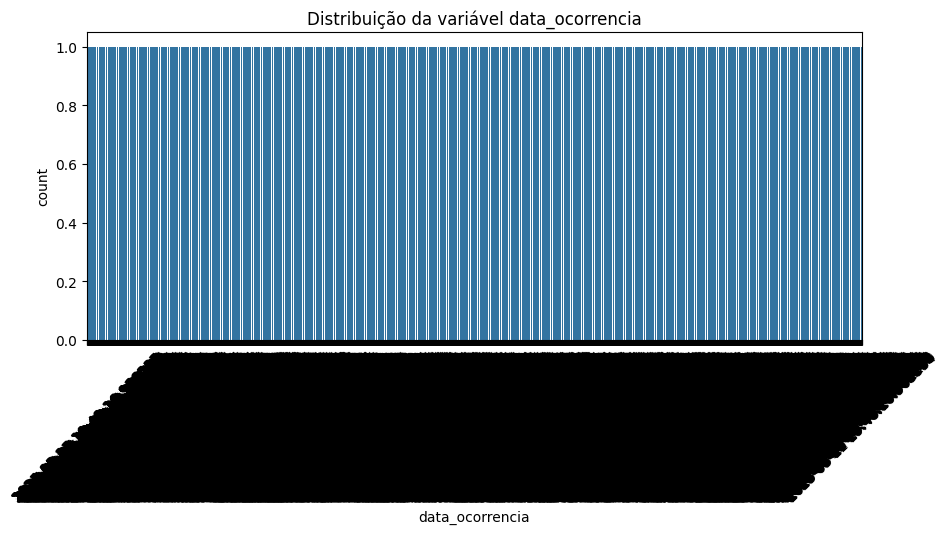

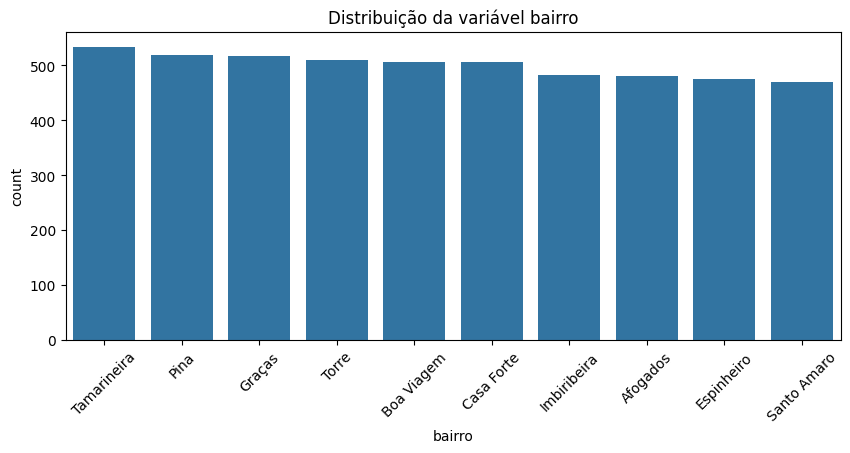

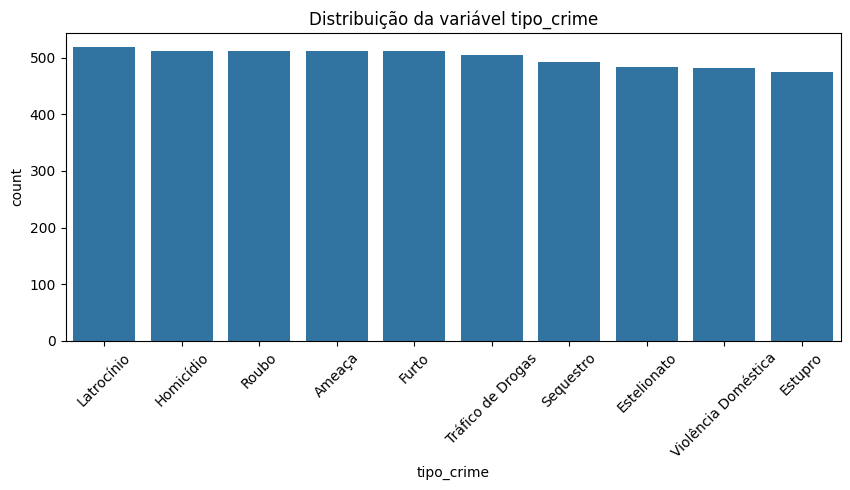

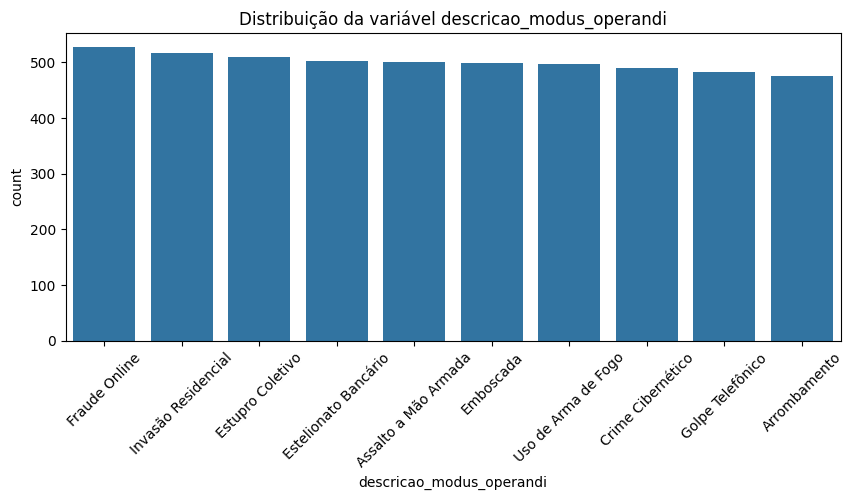

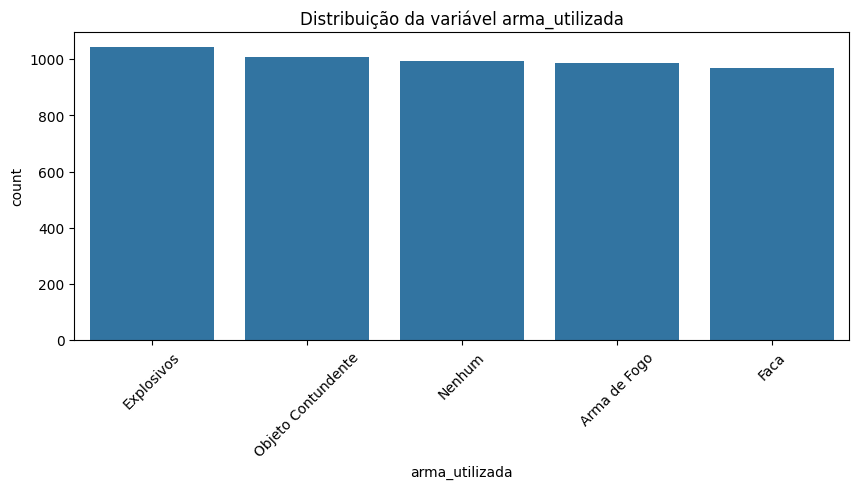

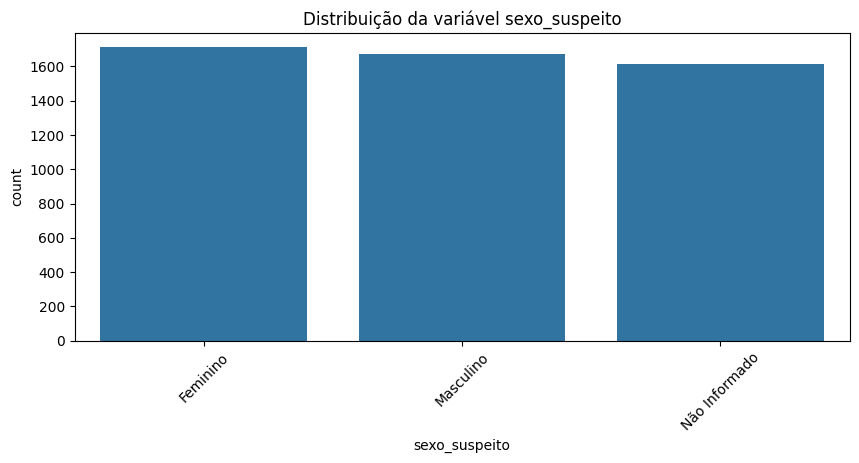

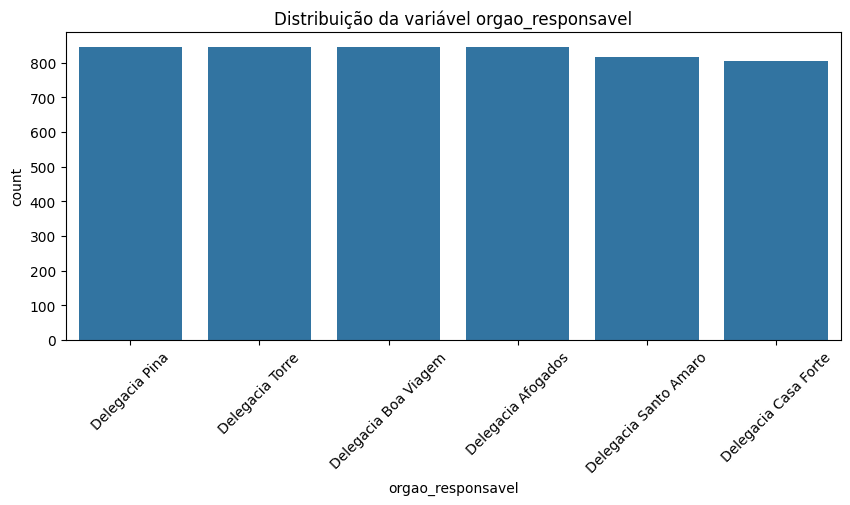

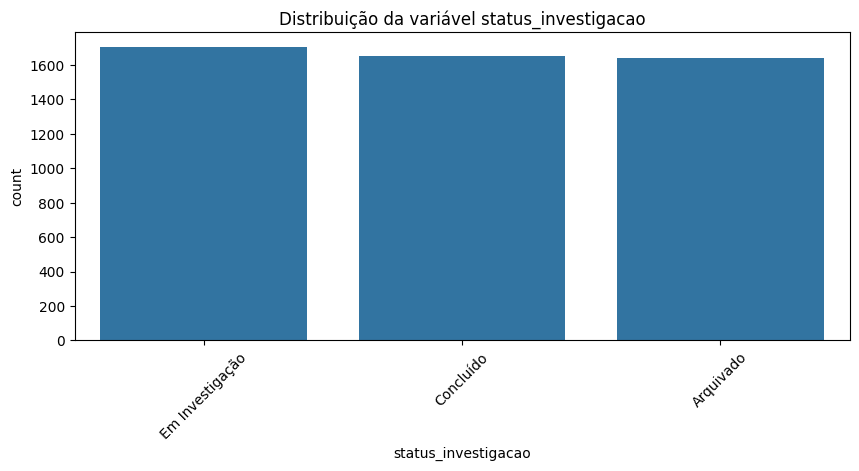

In [13]:
# Contagem de categorias
for col in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribuição da variável {col}")
    plt.show()


## Insights das Variáveis Categóricas

**Principais descobertas:**
- **Bairros**: A tamarineira é o bairro com um maior casos de crimes
- **Tipos de crime**: Certos crimes são mais frequentes (Faude online e invasão residencial.)
- **Sexo dos suspeitos**: O sexo feminino é um pouco mais predominânte que o masculino.
- **Armas utilizadas**: Se tem uma  preferência por explosivos.

**Implicações para modelagem:**
- **Encoding necessário**: Todas as variáveis categóricas precisam ser convertidas para numéricas
- **Feature engineering**: Agrupar categorias raras pode melhorar a performance.

ANÁLISE TEMPORAL

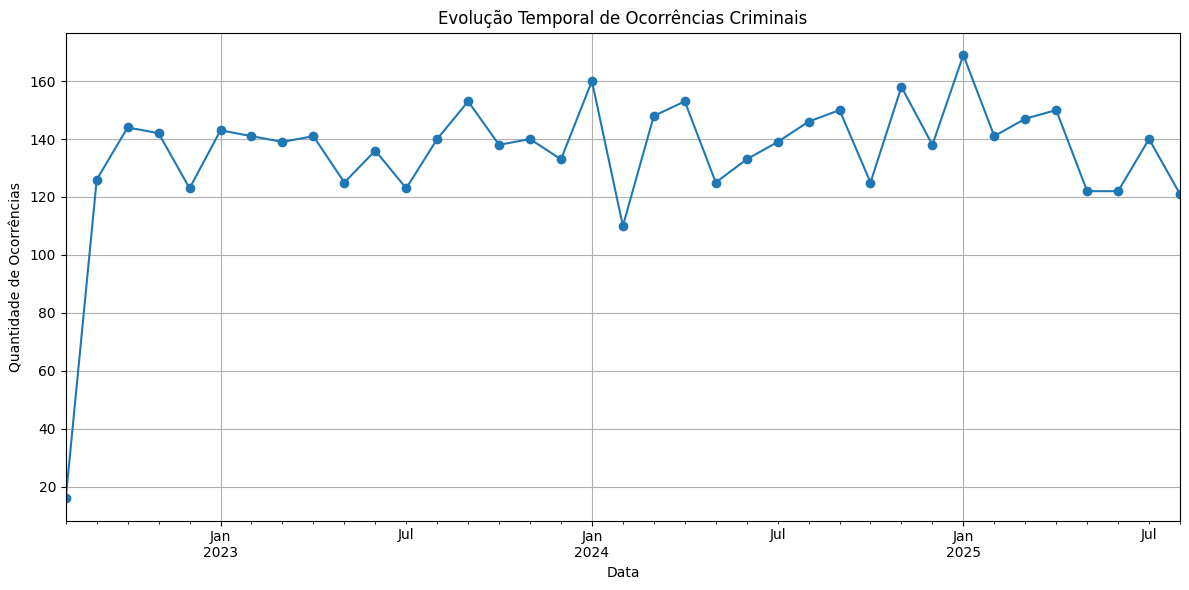

In [16]:
# Converter data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Agrupar por mês
df_time = df.groupby(df["data_ocorrencia"].dt.to_period("M")).size()


# Converter o index para datetime para melhor visualização no gráfico
df_time.index = df_time.index.to_timestamp()

# Plotar a série temporal
plt.figure(figsize=(12,6))
df_time.plot(marker='o')  # marker para visualizar os pontos
plt.title("Evolução Temporal de Ocorrências Criminais")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights da Análise Temporal Geral

**Principais descobertas:**
- **Tendência temporal**: Identificação de períodos com maior/menor incidência criminal.O de maior foi em janeiro de 2025 e o menor foi em fevereiro de 2024.
- **Sazonalidade**: Possíveis padrões mensais ou sazonais de criminalidade
- **Picos e vales**: Momentos específicos com concentração anormal de crimes
- **Evolução ao longo do tempo**: Tendência de aumento, diminuição ou estabilidade

**Implicações para predição:**
- **Features temporais importantes**: Mês, trimestre, ano são preditores relevantes
- **Padrões cíclicos**: Modelos podem capturar comportamentos recorrentes
- **Baseline temporal**: Entender a tendência histórica como referência para predições

FILTRAR POR CRIME 

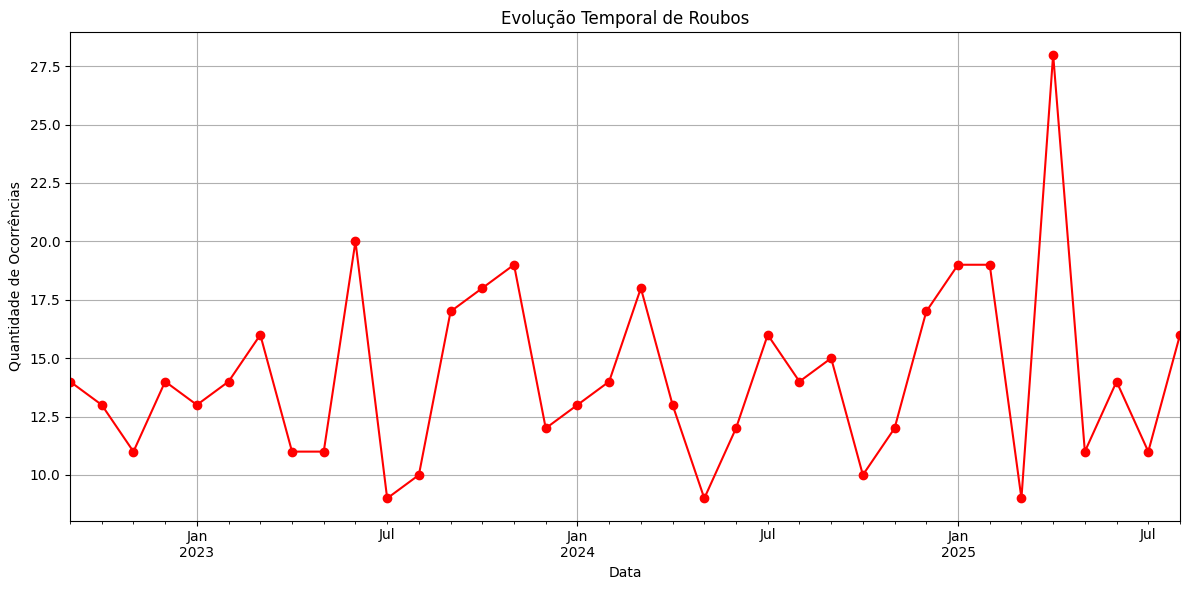

In [19]:
df_roubo = df[df["tipo_crime"] == "Roubo"]
df_time_roubo = df_roubo.groupby(df_roubo["data_ocorrencia"].dt.to_period("M")).size()
df_time_roubo.index = df_time_roubo.index.to_timestamp()

plt.figure(figsize=(12,6))
df_time_roubo.plot(marker='o', color='red')
plt.title("Evolução Temporal de Roubos")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights da Análise Temporal por Tipo de Crime

**Principais descobertas sobre Roubos:**
- **Padrões específicos**: Roubos podem ter sazonalidade diferente de outros crimes
- **Concentração temporal**: Identificação de períodos de maior risco para este tipo específico


**Implicações estratégicas:**
- **Policiamento especializado**: Períodos específicos requerem atenção especial para roubos.

FILTAR POR BAIRRO

<Figure size 1400x700 with 0 Axes>

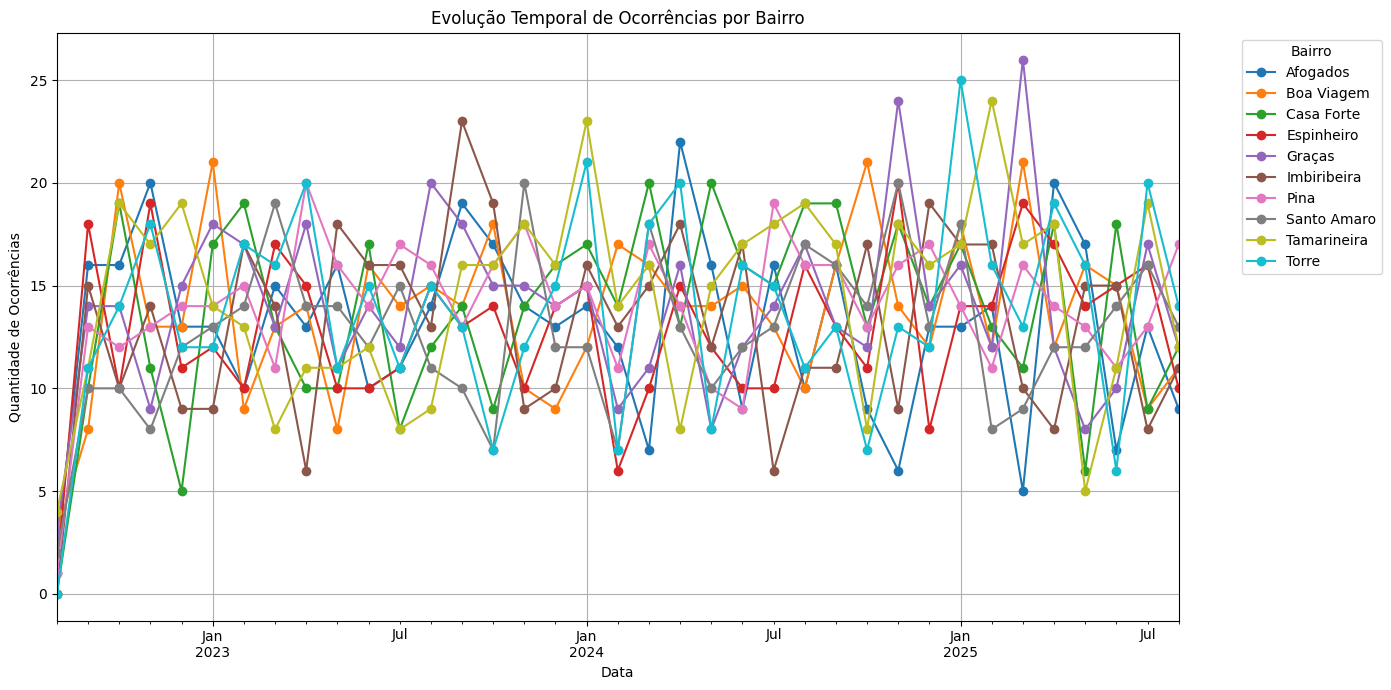

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a data
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar uma coluna com o mês/ano (período mensal)
df["mes_ocorrencia"] = df["data_ocorrencia"].dt.to_period("M")

# Agrupar por mês e bairro
df_grouped = df.groupby(["mes_ocorrencia", "bairro"]).size().unstack(fill_value=0)

# Converter o índice para timestamp (datetime) para melhor plot
df_grouped.index = df_grouped.index.to_timestamp()

# Plotar todas as linhas por bairro
plt.figure(figsize=(14, 7))
df_grouped.plot(marker='o', figsize=(14, 7))

plt.title("Evolução Temporal de Ocorrências por Bairro")
plt.xlabel("Data")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fora do gráfico
plt.tight_layout()
plt.show()


## Insights da Análise Temporal por Bairro

**Principais descobertas:**
- **Hotspots criminais**: Alguns bairros tem picos maiores em 2025 como o bairro das graças.


**Implicações para segurança pública:**
- **Prevenção territorial**: Intervenções preventivas direcionadas por localização

Análise Bivariada

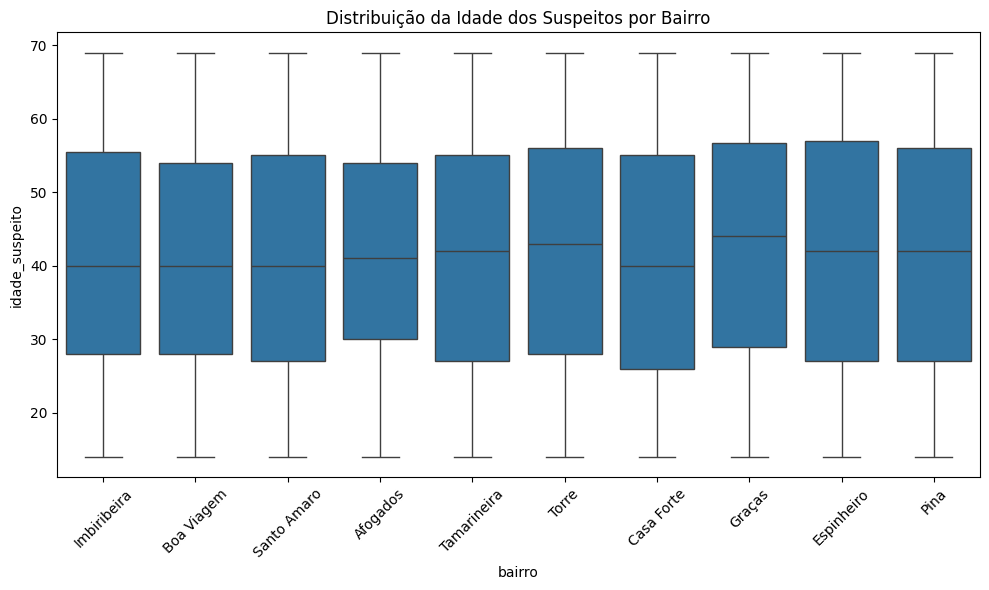

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bairro", y="idade_suspeito")
plt.title("Distribuição da Idade dos Suspeitos por Bairro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔗 Insights da Análise Bivariada

**Idade dos Suspeitos por Bairro:**
- **Perfis etários diferentes**: Cada bairro pode ter predominância de faixas etárias específicas
- **Padrões socioeconômicos**: Correlação entre localização e perfil demográfico dos suspeitos
- **Outliers de idade**: Identificação de casos atípicos que podem indicar erros ou situações especiais

**Implicações para investigação:**
- **Perfis regionais**: Entender características dos suspeitos por área facilita investigações
- **Estratégias preventivas**: Programas sociais podem ser direcionados por faixa etária/região
- **Padrões investigativos**: Acelerar identificação com base em perfis regionais típicos

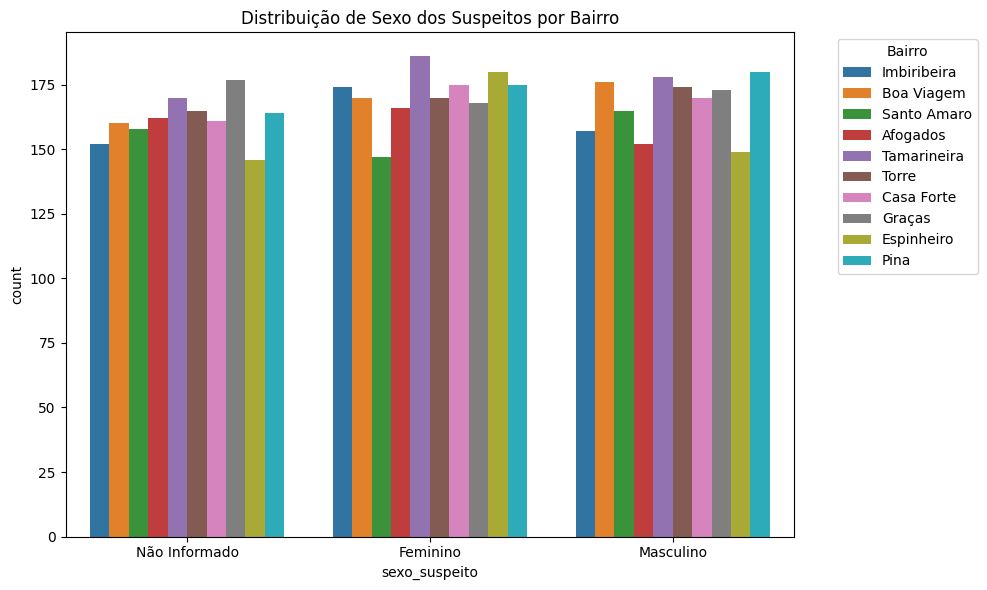

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="sexo_suspeito", hue="bairro")
plt.title("Distribuição de Sexo dos Suspeitos por Bairro")
plt.xticks(rotation=0)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 👥 Insights do Sexo dos Suspeitos por Bairro

**Principais descobertas:**
- **Distribuição de gênero**: Padrões de criminalidade podem variar entre sexos por região
- **Concentração geográfica**: Alguns bairros podem ter predominância de suspeitos de determinado sexo
- **Casos "Não Informado"**: Alta incidência pode indicar problemas na coleta de dados

**Implicações operacionais:**
- **Estratégias de abordagem**: Adaptar táticas conforme perfil predominante por área
- **Qualidade dos dados**: Reduzir casos "Não Informado" melhora a qualidade das análises
- **Perfis investigativos**: Acelerar investigações com base em padrões de gênero/localização

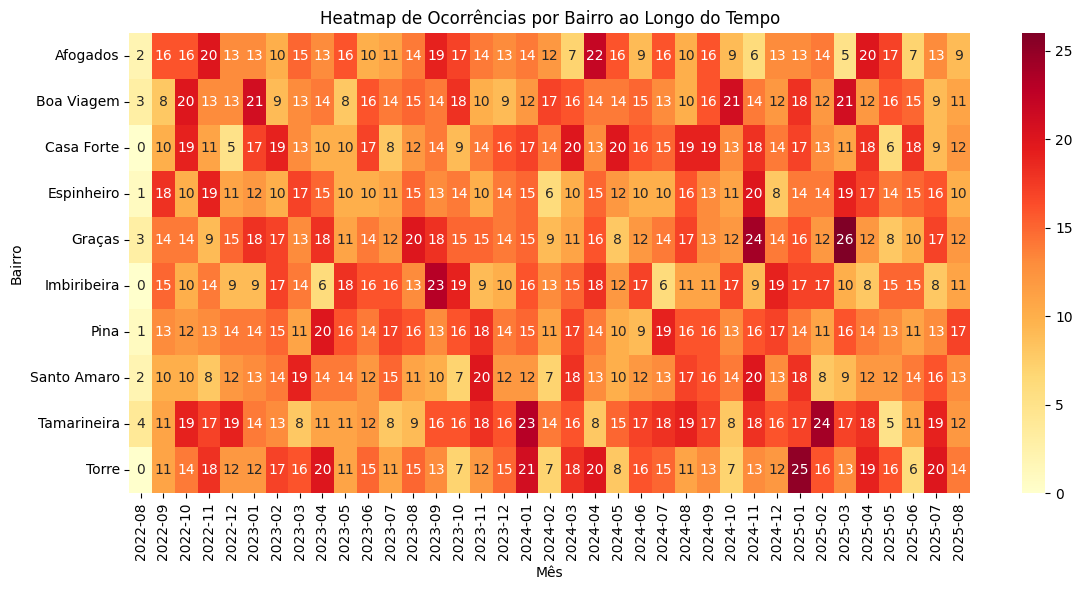

In [25]:
df["mes"] = df["data_ocorrencia"].dt.to_period("M")
df_bairro_mes = df.groupby(["mes", "bairro"]).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_bairro_mes.T, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Heatmap de Ocorrências por Bairro ao Longo do Tempo")
plt.xlabel("Mês")
plt.ylabel("Bairro")
plt.tight_layout()
plt.show()

## Insights do Heatmap Temporal-Geográfico

**Principais descobertas:**
- **Hotspots espaço-temporais**: Identificação de combinações bairro-período com alta criminalidade
- **Correlações espaço-tempo**: Alguns períodos afetam mais determinadas regiões
- **Zonas de atenção**: Células vermelhas indicam necessidade de intervenção urgente

**Implicações estratégicas:**
- **Alocação temporal de recursos**: Intensificar policiamento em períodos/locais específicos
- **Planejamento anual**: Antecipar necessidades baseado em padrões históricos


<Figure size 1400x700 with 0 Axes>

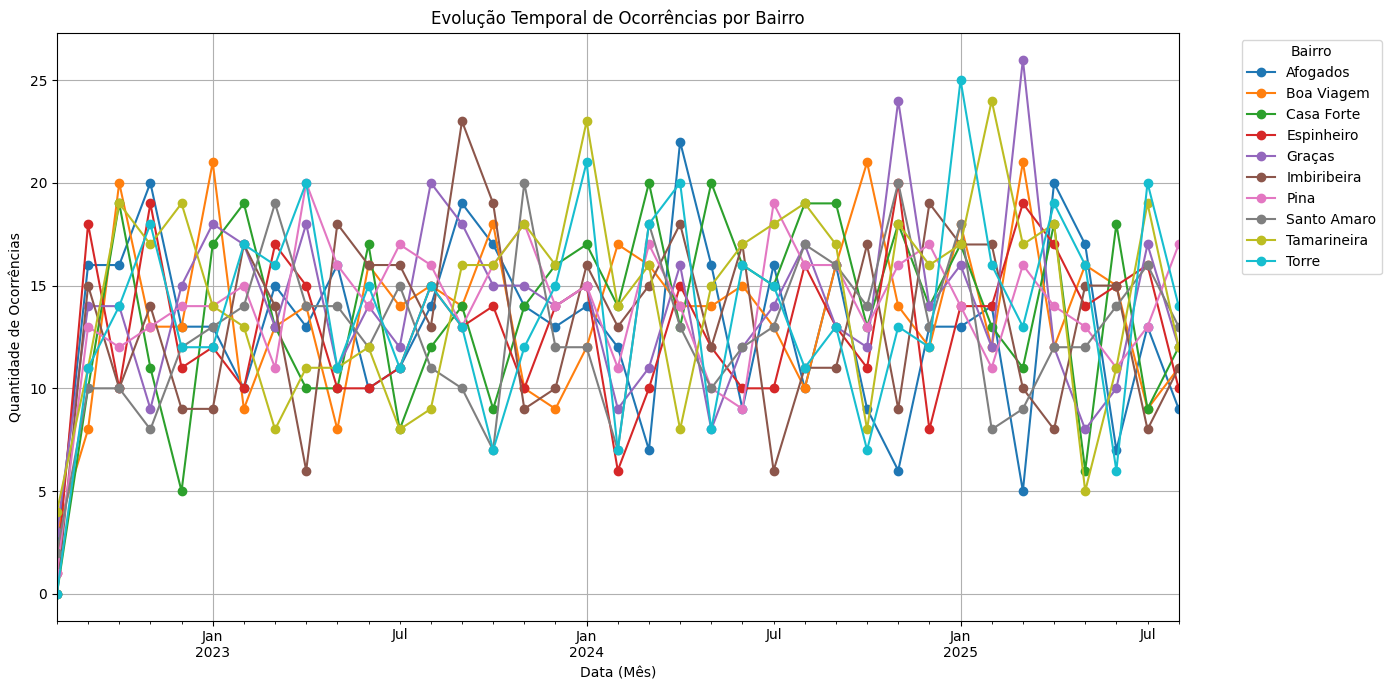

In [ ]:
df["data_ocorrencia"] = pd.to_datetime(df["data_ocorrencia"])

# Criar uma coluna com o período mensal
df["mes"] = df["data_ocorrencia"].dt.to_period("M")

# Agrupar por mês e bairro
df_grouped = df.groupby(["mes", "bairro"]).size().unstack(fill_value=0)

# Converter o índice para timestamp para plotagem
df_grouped.index = df_grouped.index.to_timestamp()

# Plotar gráfico de linhas
plt.figure(figsize=(14, 7))
df_grouped.plot(marker='o', figsize=(14, 7))  # múltiplas linhas, uma por bairro

plt.title("Evolução Temporal de Ocorrências por Bairro")
plt.xlabel("Data (Mês)")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

MOSTRAR OS 5 BAIRROS QUE TEM MAIS CRIMES 

<Figure size 1400x700 with 0 Axes>

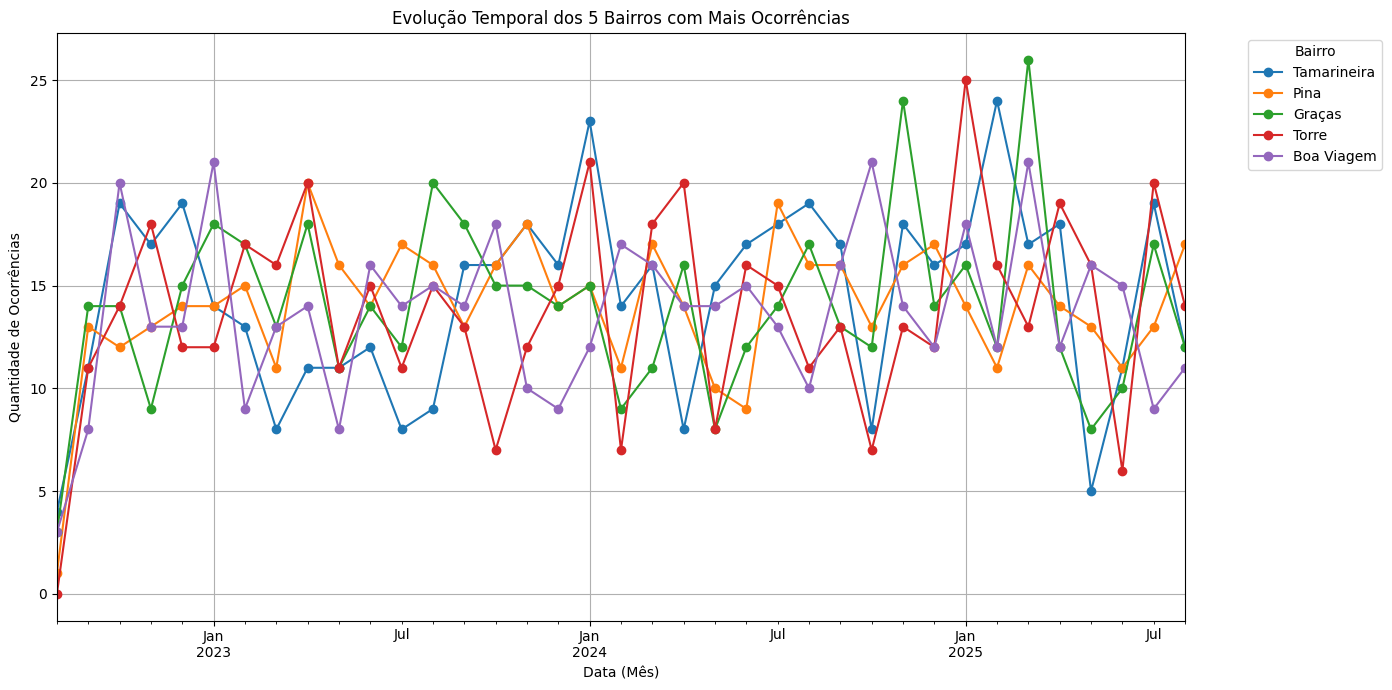

In [27]:
# Top 5 bairros com mais crimes
top_bairros = df["bairro"].value_counts().nlargest(5).index

# Filtrar apenas esses bairros no agrupamento
df_grouped_top = df_grouped[top_bairros]

# Plotar
plt.figure(figsize=(14, 7))
df_grouped_top.plot(marker='o', figsize=(14, 7))
plt.title("Evolução Temporal dos 5 Bairros com Mais Ocorrências")
plt.xlabel("Data (Mês)")
plt.ylabel("Quantidade de Ocorrências")
plt.grid(True)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##  Insights dos Top 5 Bairros Críticos

**Principais descobertas:**
- **Concentração de criminalidade**: 5 bairros concentram a maior parte dos crimes e em determinada época tem picos em alguns bairros.
- **Padrões distintos**: Comportamentos temporais únicos requerem estratégias específicas



MOSTRAR O BAIRRO POR TIPO DE CRIME 

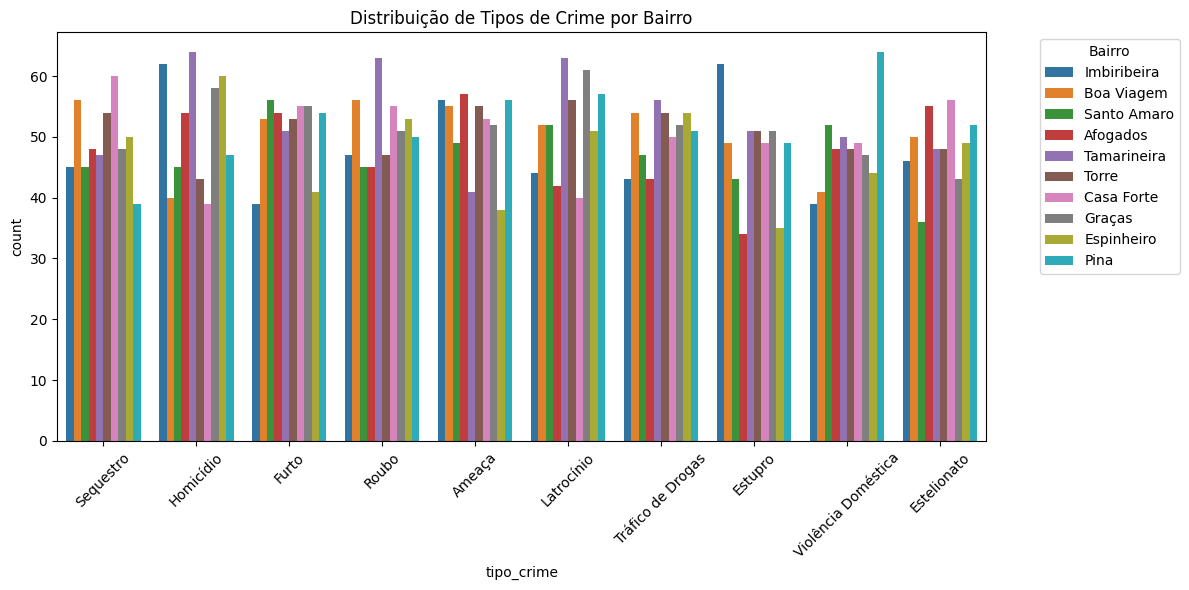

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="tipo_crime", hue="bairro")
plt.title("Distribuição de Tipos de Crime por Bairro")
plt.xticks(rotation=45)
plt.legend(title="Bairro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Insights da Distribuição de Crimes por Bairro

**Principais descobertas:**
- **Especialização criminal**: A tamarineira tem mais homicídios, roubos e latrocínio.Enquanto Casa Forte tem tem mais sequestros e Estelionato. No pina tem mais violência doméstica. E por fim imbiribeira tem mais estrupo.
- **Padrões regionais**: Características socioeconômicas influenciam tipos de crime
- **Crimes predominantes**: Identificação dos tipos mais comuns em cada região.


**Implicações preventivas:**
- **Estratégias especializadas**: Focar prevenção nos tipos predominantes por bairro
- **Recursos direcionados**: Alocar especialistas conforme perfil criminal regional
- **Campanhas educativas**: Adaptar mensagens preventivas por tipo de crime/região
- **Inteligência criminal**: Entender motivações e oportunidades por área

Outliers

In [31]:
from scipy.stats import zscore
import numpy as np

# Selecionar colunas numéricas relevantes
numericas = df.select_dtypes(include='number').drop(columns=["latitude", "longitude"])

# Calcular Z-scores
z_scores = zscore(numericas)

# Identificar outliers com Z-score > 3 ou < -3
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]

# Mostrar resultado
print(f"Outliers detectados: {outliers.shape[0]}")
display(outliers)


Outliers detectados: 0


,id_ocorrencia,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao,latitude,longitude,mes_ocorrencia,mes


## Insights da Análise de Outliers

**Principais descobertas:**
- **Casos extremos identificados**: Não teve nenhum Outliers, está tudo dentro do padrão.



# RECOMENDAÇÕES PARA PRÉ-PROCESSAMENTO

Com base na análise exploratória realizada, as seguintes etapas são essenciais para preparar os dados para modelagem:


- **Validação de datas**: Tranformar a coluna de data de ocorrência em três para extrair ano, mês , dia e horário.

e




## 🏷️ 4. Encoding de Variáveis Categóricas
- **One-Hot Encoding**: Para variáveis com poucas categorias (sexo, status_investigacao)


## ⏰ 5. Engenharia de Features Temporais
- **Extração de componentes**: Ano, mês, dia da semana, hora
- **Sazonalidade**: Trimestre, estação do ano
- **Features cíclicas**: sin/cos para capturar ciclicidade temporal
- **Lag features**: Crimes dos períodos anteriores para capturar tendências



## 📊 7. Balanceamento de Classes
- **Verificar desbalanceamento**: Principalmente na variável target 




## 🎯 8. Seleção e Criação da Variável Target
- **Definir objetivo**: Crime  (quantos crimes irão acontecer em um determinado bairro naquele mês )
- **Agregação temporal**: Definir janela de predição (próximo mês, semana, dia)


## 🔍 9. Feature Selection
- **Remoção de redundâncias**: Eliminar features altamente correlacionadas
- **Importância**: Usar métodos como SelectKBest, RFE ou importância do Random Forest
- **Vazamento de dados**: Remover features que não estarão disponíveis na predição

## ✅ 10. Validação e Splits
- **Divisão temporal**: Train/test respeitando ordem cronológica
- **Validação cruzada**: Time series split para respeitar temporalidade
- **Estratificação**: Manter proporções de classes e bairros

## 📈 11. Pipeline de Preprocessamento
- **Criar pipeline**: Sequência reproduzível de transformações
- **Salvar transformadores**: Fitted encoders e scalers para usar em produção
- **Documentação**: Registrar todas as transformações aplicadas

---

**⚠️ ATENÇÃO ESPECIAL:**
- **Temporalidade**: Nunca usar informações futuras para predizer o passado
- **Vazamento geográfico**: Cuidado com features que podem "vazar" a localização exata
- **Reprodutibilidade**: Fixar random_state em todas as operações aleatórias
- **Monitoramento**: Acompanhar distribuições antes/depois das transformações

**🎯 PRÓXIMO PASSO:** Implementar essas transformações no notebook `processamento.ipynb`